In [1]:
import sys
sys.path.append("..")

from helper_basic import *
import helper_basic as hp
import helper_finetime as hpt
import helper_visa as vs
reload(vs)



<module 'helper_visa' from 'C:\\Users\\mathusla\\Documents\\MATHUSLA\\JupyterNotebooks\\Hardware\\Keysight\\..\\helper_visa.py'>

# Step 1: connect to the Keysight 81160A generator
- If you don't know the address, do vs.connect()
- Otherwise, put the address in the argument will speed it up

**Note** : You need to manually disconnect it after using, otherwise the equipment is stuck in remote mode   
    **vs.disconnect(funcgen)**

In [114]:
# funcgen = vs.connect(timeout=30000) # set 30 second timeout
funcgen = vs.connect("USB0::0x0957::0x4108::MY60410882::0::INSTR", timeout=30000) # set 30 second timeout
# vs.disconnect(funcgen)

Connected to VISA [USB0::0x0957::0x4108::MY60410882::0::INSTR]:  Agilent Technologies,81160A,MY60410882,2.0.0.0-2.6



In [142]:
reload(vs)

<module 'helper_visa' from 'C:\\Users\\mathusla\\Documents\\MATHUSLA\\JupyterNotebooks\\Hardware\\Keysight\\..\\helper_visa.py'>

# Example 1: generate a pulse repetitively 

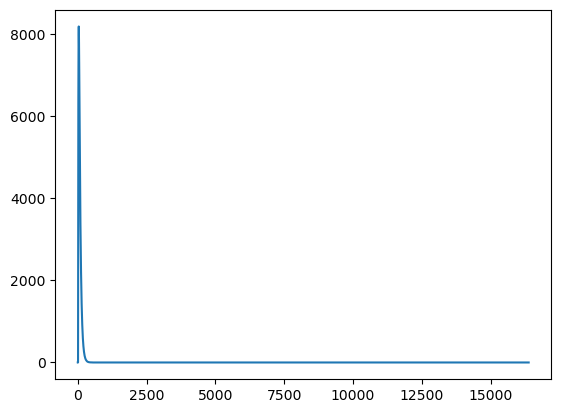

In [146]:
waveform_length = 16384
samples_per_ns = 2.5 # 2.5 Gsps --> 2.5 samples per ns
ch=1

waveform_duration = waveform_length/samples_per_ns

# Make the waveform and plot
waveform = hp.pulse_2pole(6,20,samples_per_ns = samples_per_ns, total_samples = waveform_length, pre_trig_samples=10)
waveform_14bit = float_to_ADU(waveform, bits=14)    
plot(waveform_14bit)

# Upload to keysight
vs.upload_waveform(funcgen, waveform_14bit, waveform_duration = waveform_duration, ch=ch, trigger_mode="INTernal2" output_voltage=0.3)

# Example 2: generate a pulse, trigger manually for once 

In [145]:
vs.upload_waveform(funcgen, waveform_14bit, waveform_duration = waveform_duration, ch=ch, trigger_mode="MAN", output_voltage=0.3)
vs.trigger(funcgen)